# NETFLIX EDA
Hi! Thi is an Exploratory Data Analysis from one of the biggest enterteiment companies from the last years


### 1)Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.graph_objs as go 
import plotly.express as px
from plotly.offline import init_notebook_mode,iplot,plot

### 2)Load the data and study the dimensions

In [2]:
data=pd.read_csv('titles.csv',parse_dates=['date_added','release_year'])
print('Our dataset have the following shape:',data.shape[0],' rows and ',data.shape[1],' columns')
print('  \n')
print('Our dataset have the next columns:', data.columns.values)

Our dataset have the following shape: 7787  rows and  12  columns
  

Our dataset have the next columns: ['show_id' 'type' 'title' 'director' 'cast' 'country' 'date_added'
 'release_year' 'rating' 'duration' 'listed_in' 'description']


### 3) Data Overview
In this step we want to know if we have missing or duplicated values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   datetime64[ns]
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](2), object(10)
memory usage: 730.2+ KB
None
  

show_id            0
type               0
title              0
director        2389
cast             718
country          

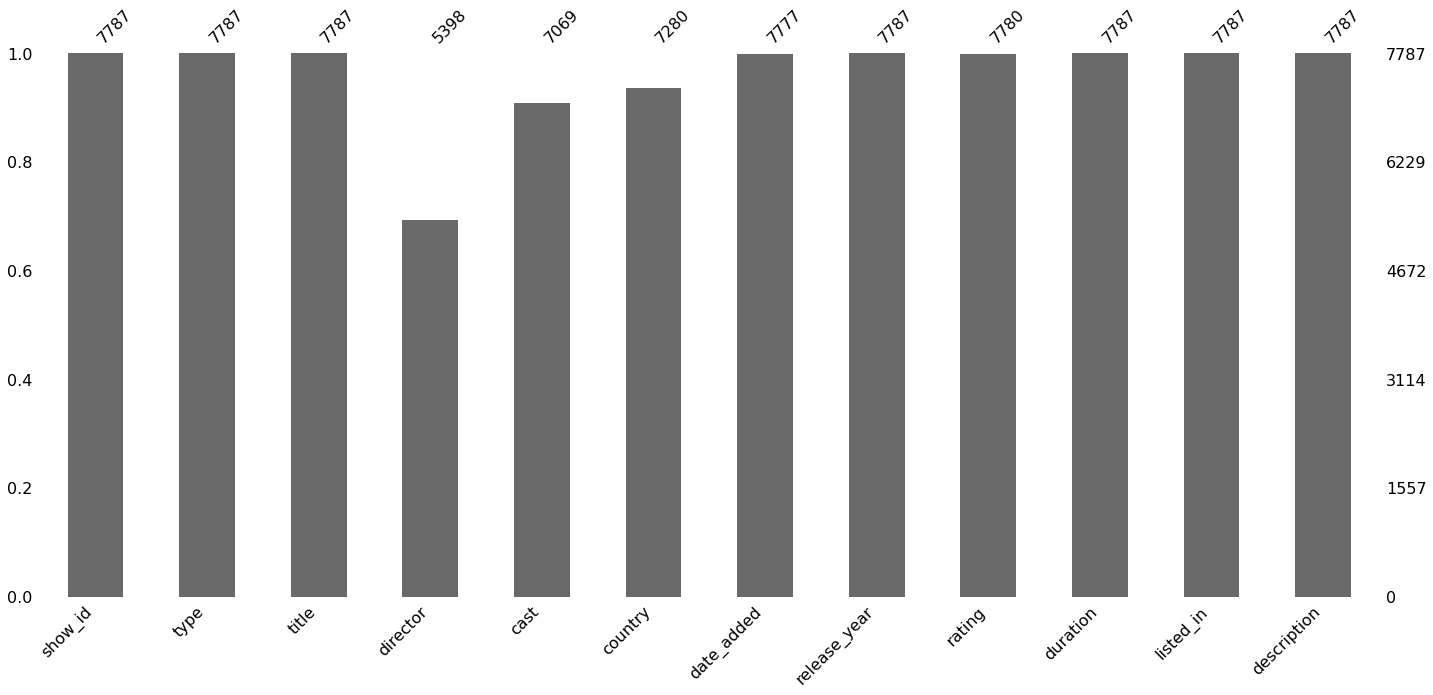

In [3]:
print(data.info())
print('  \n')
print(data.isna().sum())
print('  \n')
print('Number of duplicated values:',data.duplicated().sum())
print('  \n')
msno.bar(data)
plt.show()

we have a large amount of missing values in director and cast columns so we delete them.

for the country column we're going to replace the NaN's with the value that repeats the most 

lastly we're going to delete the rows where missing values are in date_added and rating columns because they are only 17 values

In [4]:
data.drop(columns=['director','cast'],inplace=True)
data['country'] = data['country'].fillna(data['country'].mode()[0])
data.dropna(how='any',subset=['rating','date_added'],inplace=True)
print(data.isna().sum())
print('  \n')
print('Our new shape is: ',data.shape)

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
  

Our new shape is:  (7770, 10)


### 4)Data Manipulation


For the date_added column we took off all the values except the year 

In [5]:
#we need to know the all de values in duration
data['date_added']=data['date_added'].dt.year

### now we are going to visualize the principal insights from the netflix dataset   

Values have this proportion:


Movie      0.691377
TV Show    0.308623
Name: type, dtype: float64

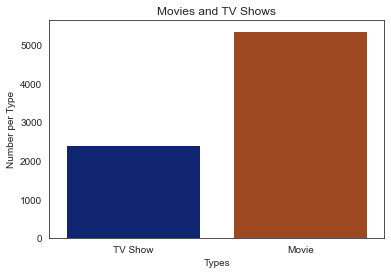

In [6]:
#Netflix type proportion
sns.set_style("white")

ptype=sns.countplot(data=data,x='type',palette='dark')
plt.title('Movies and TV Shows')
ptype.set(ylabel='Number per Type',xlabel='Types')

print('Our values have this proportion:')
data.type.value_counts(normalize=True)



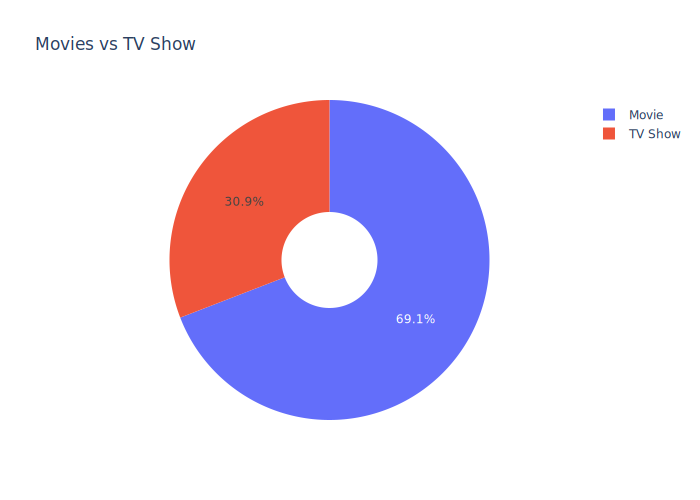

In [7]:
showtype=data.type.value_counts()
fig = px.pie( values=showtype.values, names=showtype.index, title='Movies vs TV Show',hole=0.3)
fig.show('svg')

it can be clearly seen that there are many more movies than tv shows. The 30.9% of the netflix catalogue are TV shows and the rest are movies (69.1%)




the country variable will now be investigated but it has a large amount of values so we'll take the first 17 for the interactive plot and 10 for the barplot

In [8]:

#We need the files as a DataFrame
countries40=data.country.value_counts().iloc[0:17]
c40=countries40.to_frame()
c40.reset_index(inplace=True)
c40.rename(columns={'index': 'country1','country':'qty'},inplace=True)
init_notebook_mode(connected=True)

dict_world = dict(
        type = 'choropleth',
        colorscale = 'Sunset',
        locations = c40['country1'],
        locationmode = "country names",
        z = c40['qty'],
        text = c40['country1'],
        colorbar = {'title' : 'Number of Films per Country'},
      )

#layout
layout = dict(title = 'Number of Films per Country',
              geo = dict(projection = {'type':'mercator'})
             )
#Iniciate the interactive plot 
choromap = go.Figure(data = [dict_world],layout = layout)
iplot(choromap,validate=False,image='svg')


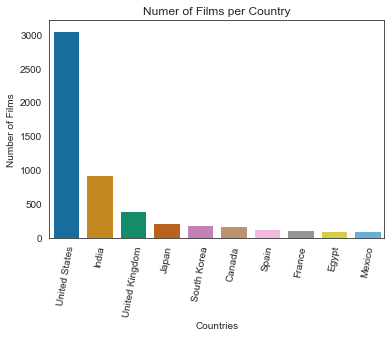

In [9]:
#10 top countries
countries10=data.country.value_counts().iloc[0:10]

cnt=sns.barplot(x=countries10.index,y=countries10.values,palette='colorblind')
cnt.set(ylabel='Number of Films',xlabel='Countries')
cnt.set_xticklabels(labels=countries10.index,rotation=80)
plt.title('Numer of Films per Country')

plt.show()


United States definitly has more movies than every country in this platform the next one is India. United States holds the highest percentage maybe because Netflix is from that country. (Disclaimer: The NaN's values were filled by the mode method)


Now we'll be investigated the proportion of movies and tv shows that are from united states

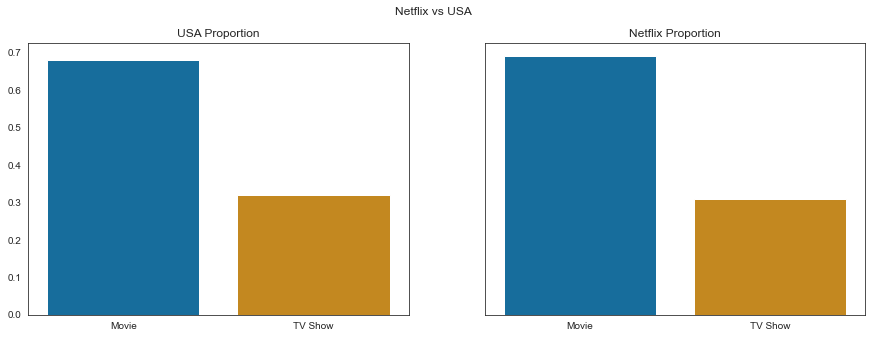

In [10]:
usa=data[data['country']=='United States']
usaT=usa.type.value_counts(normalize=True)
netT=data.type.value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Netflix vs USA')

#USA proportion
sns.barplot(ax=axes[0], x=usaT.index,y=usaT.values,palette='colorblind')
axes[0].set_title('USA Proportion')

#Netflix proportion
sns.barplot(ax=axes[1], x=netT.index,y=netT.values,palette='colorblind')
axes[1].set_title('Netflix Proportion')
plt.show()


As we can see, the proportion of netflix and USA are almost the same

Now we´re going to investigate the quantity of films uploaded to the platform each year 

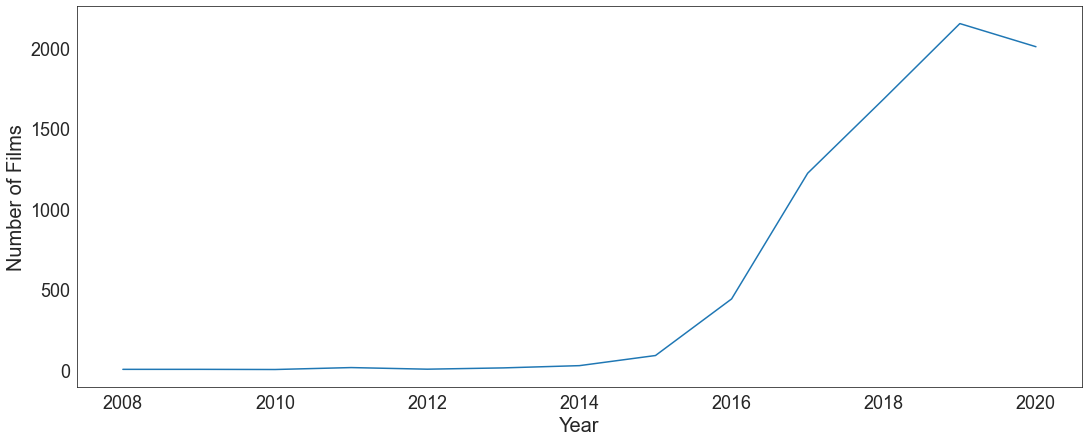

In [11]:
#convert to dataframe the sum of values for each year
added=data.date_added.value_counts()
added1=added.to_frame()
added1.reset_index(inplace=True)
added1.rename(columns={'index': 'year','date_added':'films'},inplace=True)
#we have to delete the '2021' row because the year hasnt ended yet
added1.drop([5],inplace=True)

#plot the dataframe
plt.figure(figsize=(18,7))
added11=sns.lineplot(data=added1,x='year',y='films',palette='dark',markers=True)
added11.set_xlabel('Year',fontsize=20)
added11.set_ylabel('Number of Films',fontsize=20)
added11.tick_params(axis='both', which='major', labelsize=18)
plt.show()

As we can see netflix led an exponential growth to add new films for the last 6 years until 2020 where the platform stopped uploading movies at the same exponential rate. this is probably related to the rise of the plataform all over the world.

now we search for the most frequent decade in the netflix catalogue


[]

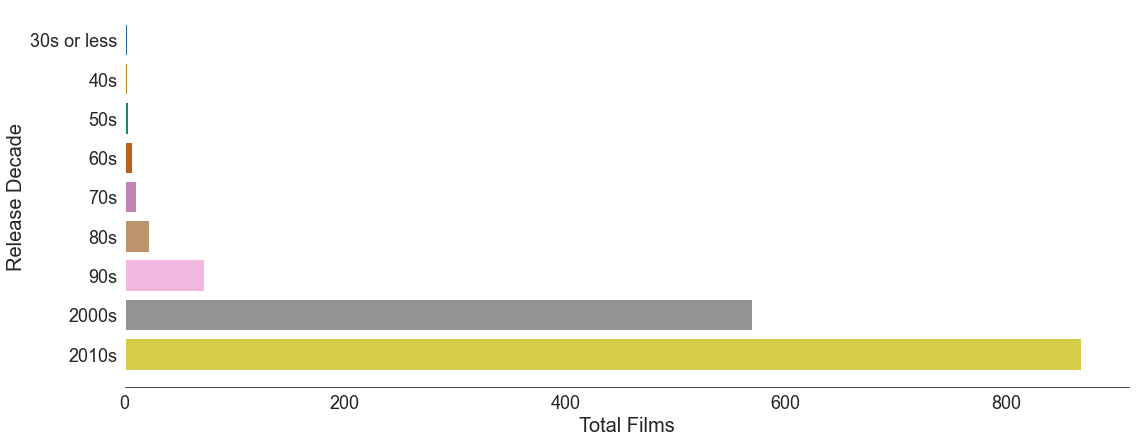

In [12]:
#grupy by decade
ry=data.release_year.dt.year.value_counts()
rey=ry.to_frame()
rey.reset_index(inplace=True)
rey.rename(columns={'index': 'release year','release_year':'total'},inplace=True)
rey.astype('int32')
bins=[1920,1949,1959,1969,1979,1989,1999,2009,2019,2020]
names=['30s or less','40s','50s','60s','70s','80s','90s','2000s','2010s']
rey['release year']=pd.cut(rey['release year'],bins,labels=names)

plt.figure(figsize=(18,7))
sns.set_style("white")
sns.despine()
r_year=sns.barplot(data=rey,y='release year',x='total',palette='colorblind',ci=None)
r_year.set_xlabel('Total Films',fontsize=20)
r_year.set_ylabel('Release Decade',fontsize=20)
r_year.tick_params(axis='both', which='major', labelsize=18)
sns.despine(left=True)


plt.plot()

There is a big difference in the decades in the netflix catalog. from 2000 to 2020 they have the most movies

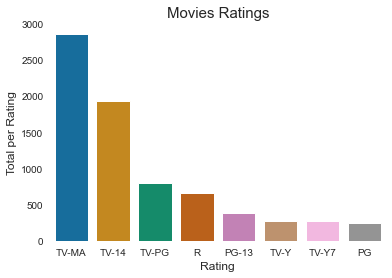

In [13]:
#plot the top eight most repeated ratings
rating=data.rating.value_counts().iloc[0:8]
rat=sns.barplot(x=rating.index,y=rating.values,palette='colorblind')
sns.despine(left=True,bottom=True)
rat.set_xlabel('Rating',fontsize=12)
rat.set_ylabel('Total per Rating',fontsize=12)
rat.tick_params(axis='both', which='major', labelsize=10)
rat.set_title('Movies Ratings',fontsize=15,)
plt.show()


As we can see the most repeated rating is TV MA. This rating says that the program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17 years old. the next one is TV 14 who states that the program may be unsuitable for children under 14 years of age

In [14]:
#Function to split the duration column
def duration_df(df):
    new_df = df.groupby(['duration']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['duration', 'counts']
    new_df = new_df.sort_values('duration')
    return new_df

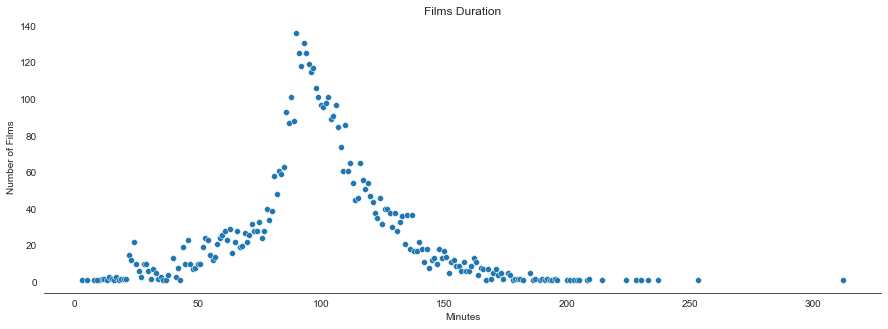

In [15]:
#Get the values of the films
movies=duration_df(data[data['type']=='Movie'])
movies['duration']=movies['duration'].str.replace(r'\D', '',regex=True).astype(int)
movies.sort_values(by='duration')

#plot the values of the films
plt.figure(figsize=(15,5))
movplot=sns.scatterplot(data=movies,x='duration',y='counts')
sns.despine(left=True)
movplot.set_title('Films Duration')
movplot.set(ylabel='Number of Films',xlabel='Minutes')
plt.show()


For all the movies in the dataset we clearly have a normal distribution and it indicates that movies that are  approximately 90 minutes long are the most frequent.

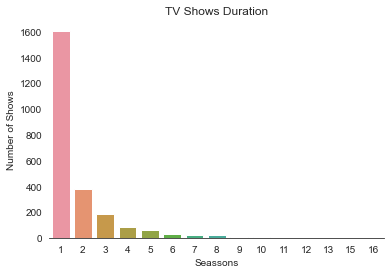

In [16]:
#Get the values of the tv shows

tvshow=duration_df(data[data['type']=='TV Show'])
tvshow['duration']=tvshow['duration'].str.replace(r'\D', '',regex=True).astype(int)

#Plot the values of the tv shows
tvplot=sns.barplot(data=tvshow,x='duration',y='counts')
sns.despine(left=True)
tvplot.set_title('TV Shows Duration')
tvplot.set(ylabel='Number of Shows',xlabel='Seassons')
plt.show()

As we can see, television shows with only one season are the most frequent. This may be because the shows are discontinued due to lack of popularity.